In [1]:
# data table
import pandas as pd
import os

datadis=pd.read_excel(os.path.join('dataPruebas','dataPeru_indicadores.xlsx'),
                     dtype={'Ubigeo': object})
datadis.head()

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,010202,Amazonas,Bagua,ARAMANGO,10940,809.07,0.361182,37.545885,62.9,9.1
1,010201,Amazonas,Bagua,BAGUA,26091,150.99,0.584063,70.795501,25.4,0.7
2,010203,Amazonas,Bagua,COPALLIN,6319,99.05,0.467245,52.571361,45.4,2.1
3,010204,Amazonas,Bagua,EL PARCO,1492,18.48,0.489049,70.215409,59.9,1.5
4,010205,Amazonas,Bagua,IMAZA,24323,4430.84,0.298089,31.295719,88.4,11.7


In [2]:
# map

os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

datadismap=gpd.read_file(os.path.join('mapsPruebas','DistritosMap.zip'))

datadismap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."


In [3]:
capitalizeColumns=lambda x: x.str.upper().str.strip()
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].apply(capitalizeColumns)
datadismap[['PROVINCIA','DISTRITO']]=datadismap[['PROVINCIA','DISTRITO']].apply(capitalizeColumns)

In [4]:
import unidecode


byePunctuation=lambda x: unidecode.unidecode(x)
datadis[['Provincia','Distrito']]=datadis[['Provincia','Distrito']].applymap(byePunctuation)
datadismap[['PROVINCIA','DISTRITO']]=datadismap[['PROVINCIA','DISTRITO']].applymap(byePunctuation)

In [5]:
len(datadis.Distrito),len(datadismap.DISTRITO)

(1874, 1874)

In [6]:
datadis.Distrito.duplicated().sum(),datadismap.DISTRITO.duplicated().sum()

(154, 152)

In [7]:
# concatenating
datadis['provDist']=["+".join(pd) for pd in zip (datadis.Provincia,datadis.Distrito)]
datadismap['provDist']=["+".join(pd) for pd in zip (datadismap.PROVINCIA,datadismap.DISTRITO)]

In [8]:
# the new column looks like this:
datadis['provDist'].head()

0    BAGUA+ARAMANGO
1       BAGUA+BAGUA
2    BAGUA+COPALLIN
3    BAGUA+EL PARCO
4       BAGUA+IMAZA
Name: provDist, dtype: object

In [9]:
# replacing dashes and multiple spaces by a simple space
datadis.provDist=datadis.provDist.str.replace("\-|\_|\s+"," ",regex=True)
datadismap.provDist=datadismap.provDist.str.replace("\-|\_|\s+"," ",regex=True)

In [10]:
datadis

,Ubigeo,Departamento,Provincia,Distrito,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,provDist
0,010202,Amazonas,BAGUA,ARAMANGO,10940,809.07,0.361182,37.545885,62.9,9.1,BAGUA+ARAMANGO
1,010201,Amazonas,BAGUA,BAGUA,26091,150.99,0.584063,70.795501,25.4,0.7,BAGUA+BAGUA
2,010203,Amazonas,BAGUA,COPALLIN,6319,99.05,0.467245,52.571361,45.4,2.1,BAGUA+COPALLIN
3,010204,Amazonas,BAGUA,EL PARCO,1492,18.48,0.489049,70.215409,59.9,1.5,BAGUA+EL PARCO
4,010205,Amazonas,BAGUA,IMAZA,24323,4430.84,0.298089,31.295719,88.4,11.7,BAGUA+IMAZA
...,...,...,...,...,...,...,...,...,...,...,...
1869,250303,Ucayali,PADRE ABAD,CURIMANA,8956,2134.04,0.379723,40.397763,57.1,13.1,PADRE ABAD+CURIMANA
1870,250302,Ucayali,PADRE ABAD,IRAZOLA,10830,998.93,0.387806,40.104714,59.2,16.4,PADRE ABAD+IRAZOLA
1871,250304,Ucayali,PADRE ABAD,NESHUYA,8445,579.51,0.455819,45.883427,60.7,8.5,PADRE ABAD+NESHUYA
1872,250301,Ucayali,PADRE ABAD,PADRE ABAD,26614,4689.20,0.475207,47.177338,47.0,12.6,PADRE ABAD+PADRE ABAD


In [11]:
datadismap

,DEPARTAMEN,PROVINCIA,DISTRITO,INSTITUCIO,geometry,provDist
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",TACNA+POCOLLAY
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9...",TACNA+CALANA
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9...",TACNA+TACNA
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",TACNA+SAMA
...,...,...,...,...,...,...
1869,LIMA,LIMA,CIENEGUILLA,IGN,"POLYGON ((-76.72917 -11.99948, -76.72596 -11.9...",LIMA+CIENEGUILLA
1870,LIMA,LIMA,ANCON,IGN,"POLYGON ((-77.06501 -11.57523, -77.06499 -11.5...",LIMA+ANCON
1871,LIMA,LIMA,CARABAYLLO,IGN,"POLYGON ((-76.89892 -11.72963, -76.89768 -11.7...",LIMA+CARABAYLLO
1872,CALLAO,CALLAO,MI PERU,IGN,"POLYGON ((-77.11491 -11.84189, -77.11450 -11.8...",CALLAO+MI PERU


In [12]:
#MERGING

In [13]:
nomatch_df=set(datadis.provDist)- set(datadismap.provDist)
nomatch_gdf=set(datadismap.provDist)-set(datadis.provDist) 

In [14]:
len(nomatch_df), len(nomatch_gdf)

(8, 8)

In [15]:
# pick the closest match from nomatch_gdf for a value in nomatch_df
from thefuzz import process
[(dis,process.extractOne(dis,nomatch_gdf)) for dis in sorted(nomatch_df)]

[('ANGARAES+HUAYLLAY GRANDE', ('ANGARAES+HUALLAY GRANDE', 98)),
 ('AYMARAES+CARAYBAMBA', ('AYMARAES+CARAIBAMBA', 95)),
 ('AYMARAES+HUAYLLO', ('AYMARAES+IHUAYLLO', 97)),
 ('HUARAZ+PAMPAS', ('HUARAZ+PAMPAS GRANDE', 90)),
 ('LEONCIO PRADO+DANIEL ALOMIAS ROBLES',
  ('LEONCIO PRADO+DANIEL ALOMIA ROBLES', 99)),
 ('LIMA+PUEBLO LIBRE', ('LIMA+MAGDALENA VIEJA', 49)),
 ('PIURA+26 DE OCTUBRE', ('PIURA+VEINTISEIS DE OCTUBRE', 86)),
 ('SAN MARTIN+PAPAPLAYA', ('SAN MARTIN+PAPA PLAYA', 98))]

In [16]:
# is this OK?
{dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

{'ANGARAES+HUAYLLAY GRANDE': 'ANGARAES+HUALLAY GRANDE',
 'AYMARAES+CARAYBAMBA': 'AYMARAES+CARAIBAMBA',
 'AYMARAES+HUAYLLO': 'AYMARAES+IHUAYLLO',
 'HUARAZ+PAMPAS': 'HUARAZ+PAMPAS GRANDE',
 'LEONCIO PRADO+DANIEL ALOMIAS ROBLES': 'LEONCIO PRADO+DANIEL ALOMIA ROBLES',
 'LIMA+PUEBLO LIBRE': 'LIMA+MAGDALENA VIEJA',
 'PIURA+26 DE OCTUBRE': 'PIURA+VEINTISEIS DE OCTUBRE',
 'SAN MARTIN+PAPAPLAYA': 'SAN MARTIN+PAPA PLAYA'}

In [17]:
# then:
changesDis_df={dis:process.extractOne(dis,nomatch_gdf)[0] for dis in sorted(nomatch_df)}

In [18]:
datadis.provDist.replace(changesDis_df,inplace=True)

In [19]:
datadismap=datadismap.merge(datadis, on='provDist')

In [20]:
# check
datadismap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1874 entries, 0 to 1873
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   DEPARTAMEN                1874 non-null   object  
 1   PROVINCIA                 1874 non-null   object  
 2   DISTRITO                  1874 non-null   object  
 3   INSTITUCIO                1874 non-null   object  
 4   geometry                  1874 non-null   geometry
 5   provDist                  1874 non-null   object  
 6   Ubigeo                    1874 non-null   object  
 7   Departamento              1874 non-null   object  
 8   Provincia                 1874 non-null   object  
 9   Distrito                  1874 non-null   object  
 10  Poblacion                 1874 non-null   int64   
 11  Superficie                1874 non-null   float64 
 12  IDH2019                   1874 non-null   float64 
 13  Educ_sec_comp2019_pct     1874 non-null 

In [21]:
bye=['Departamento', 'Provincia', 'Distrito','INSTITUCIO']
datadismap.drop(columns=bye,inplace=True)

# keeping
datadismap.head()

,DEPARTAMEN,PROVINCIA,DISTRITO,geometry,provDist,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1...",TACNA+CORONEL GREGORIO ALBARRACIN LANCHIPA,230110,123662,187.74,0.578968,71.178389,15.8,0.8
1,TACNA,TACNA,POCOLLAY,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9...",TACNA+POCOLLAY,230108,22319,265.65,0.645954,75.825743,16.1,0.9
2,TACNA,TACNA,CALANA,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9...",TACNA+CALANA,230103,3338,108.38,0.564102,77.829717,15.9,3.3
3,TACNA,TACNA,TACNA,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9...",TACNA+TACNA,230101,80845,1877.78,0.696613,75.491958,7.4,0.6
4,TACNA,TACNA,SAMA,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9...",TACNA+SAMA,230109,2679,1115.98,0.552622,70.500250,52.4,10.8


In [22]:
datadismap.to_file(os.path.join('mapsPruebas',"dataMapPeru.gpkg"), layer='distritos', driver="GPKG")


In [23]:
# Exploring one variable

In [24]:
# statistics
datadismap.IDH2019.describe()

count    1874.000000
mean        0.409405
std         0.140059
min         0.091195
25%         0.304729
50%         0.386020
75%         0.507002
max         0.845217
Name: IDH2019, dtype: float64

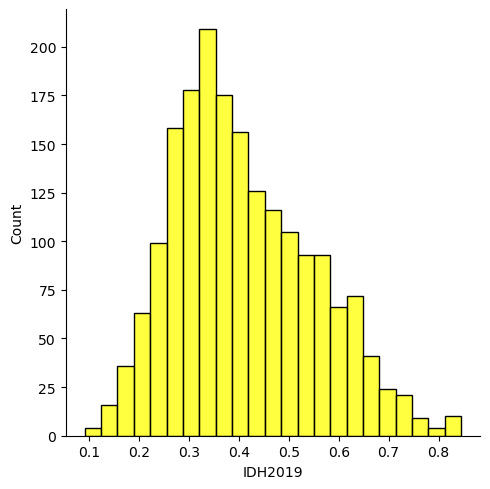

In [25]:
import seaborn as sea

sea.displot(datadismap.IDH2019, color='yellow')

<Axes: >

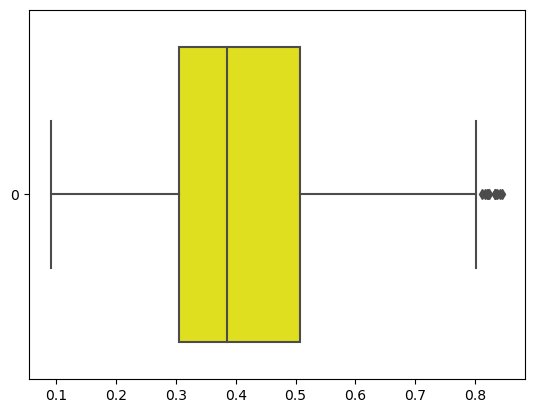

In [26]:
sea.boxplot(datadismap.IDH2019, color='yellow',orient='h')

In [27]:
import mapclassify 
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(datadismap['IDH2019'], k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(datadismap['IDH2019'])
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts                                
q5=mapclassify.Quantiles(datadismap['IDH2019'],k=K)

# based on similarity, good for multimodal data 
mb5 = mapclassify.MaximumBreaks(datadismap['IDH2019'], k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(datadismap['IDH2019']) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(datadismap['IDH2019'], k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(datadismap['IDH2019'], k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(datadismap['IDH2019'], k=K)   

In [28]:
# a frequency table by default
ht

HeadTailBreaks

  Interval     Count
--------------------
[0.09, 0.41] |  1047
(0.41, 0.54] |   461
(0.54, 0.63] |   211
(0.63, 0.69] |    97
(0.69, 0.75] |    36
(0.75, 0.80] |    10
(0.80, 0.83] |     6
(0.83, 0.84] |     4
(0.84, 0.84] |     1
(0.84, 0.85] |     1

In [29]:
# group label
ht.yb

array([2, 3, 2, ..., 3, 3, 6])

In [30]:
# labels and counts
np.unique(ht.yb,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1047,  461,  211,   97,   36,   10,    6,    4,    1,    1],
       dtype=int64))

In [31]:
# ht.yb into a pandas Series

pd.Series(ht.yb).value_counts()

0    1047
1     461
2     211
3      97
4      36
5      10
6       6
7       4
9       1
8       1
dtype: int64

In [32]:
# these are the cuts, but it is not including the min value
ht.bins

array([0.40940512, 0.53944062, 0.62656757, 0.68924791, 0.74999441,
       0.79944501, 0.82690534, 0.8375162 , 0.84382218, 0.84521661])

In [33]:
# completing the bins
HT_bins=list(ht.bins)
HT_bins.insert(0,datadismap.IDH2019.min())

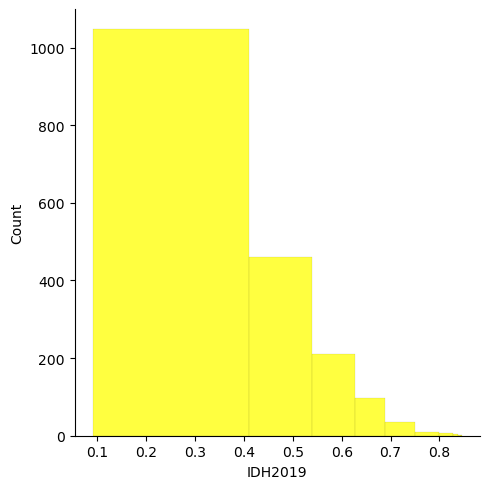

In [34]:
sea.displot(datadismap.IDH2019, bins=HT_bins,color='yellow')

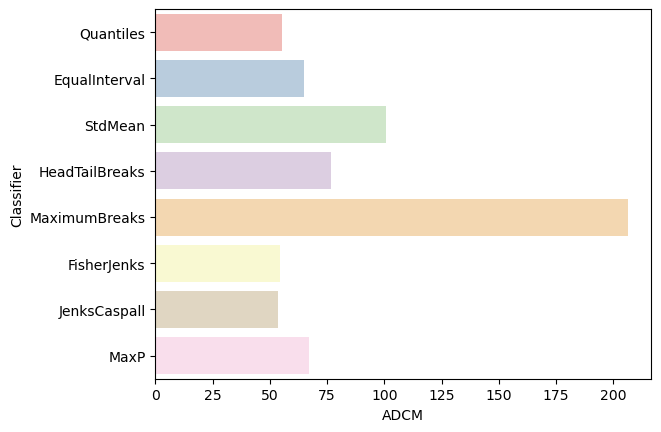

In [35]:
class5 = q5, ei5,msd, ht, mb5, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']
ax = sea.barplot(
    y='Classifier', x='ADCM', data=adcms, palette='Pastel1'
)

In [36]:
datadismap['QU'] = q5.yb 
datadismap['FJ'] = fj5.yb
datadismap['JC'] = jc5.yb

In [37]:
# haow many cases per scheme:

class5new = q5,fj5, jc5
pd.DataFrame(
    {c.name: c.counts for c in class5new},
    index=['Class-{}'.format(i) for i in range(5)]
)

,Quantiles,FisherJenks,JenksCaspall
Class-0,375,351,352
Class-1,375,584,484
Class-2,374,424,403
Class-3,375,330,351
Class-4,375,185,284


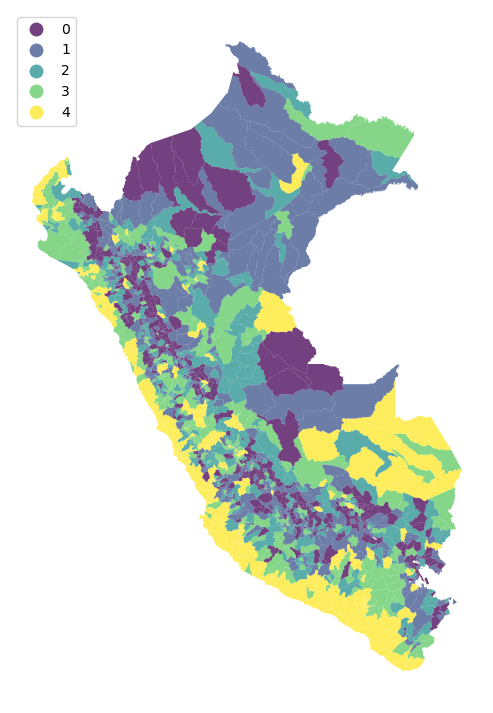

In [38]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(9, 9))
datadismap.plot(column='QU', 
        cmap='viridis', 
        categorical=True,
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

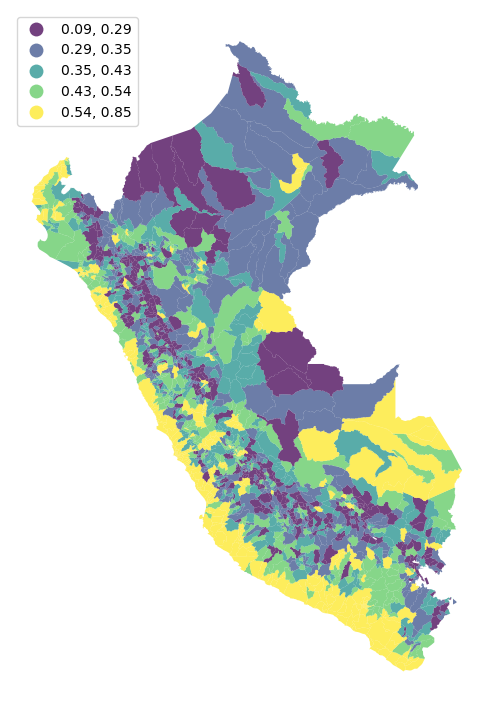

In [39]:
f, ax = plt.subplots(1, figsize=(9, 9))
datadismap.plot(column='IDH2019', 
        cmap='viridis',       
        scheme='Quantiles',
        k=5, 
        edgecolor='white', 
        linewidth=0., 
        alpha=0.75, 
        legend=True,
        legend_kwds=dict(loc=2),
        ax=ax
       )

ax.set_axis_off()

In [41]:
# update
datadismap.to_file(os.path.join('mapsPruebas',"dataMapPeru.gpkg"), layer='distritos', driver="GPKG")


In [42]:
# Exploring several variables